# [Sampling in Python](https://www.datacamp.com/completed/statement-of-accomplishment/course/34b5046a910fccce1e6a85d1dfe2e4652c0291ba)

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/adamelliotfields/datacamp/blob/main/notebooks/courses/sampling_in_python/notebook.ipynb)
[![Render nbviewer](https://raw.githubusercontent.com/jupyter/design/main/logos/Badges/nbviewer_badge.svg)](https://nbviewer.org/github/adamelliotfields/datacamp/blob/main/notebooks/courses/sampling_in_python/notebook.ipynb)

**Contents**
- [Introduction](#Introduction)
- [Sampling Methods](#Sampling-Methods)
- [Sampling Distributions](#Sampling-Distributions)
- [Bootstrap Distributions](#Bootstrap-Distributions)

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from itertools import product
from scipy.stats import norm

pd.set_option('display.width', 400)

attrition = pd.read_csv('attrition.csv')
spotify = pd.read_csv('spotify.csv')


## Introduction

Working with a subset of an entire dataset is _sampling_. The _population_ is the entire dataset, and the _sample_ is the subset that you are working with.

A _population parameter_ is a value that describes the population. A _sample statistic_ or _point estimate_ is a value that describes the sample.

Collecting data by the easiest means possible is _convenience sampling_. This is not a good way to collect data because it is not representative of the population, which introduces _sample bias_.

### Pseudo-random Number Generation

A _random number generator_ is a function that produces a sequence of numbers that are not predictable. A _pseudo-random number generator_ is a function that produces a sequence of numbers that are not predictable, but are reproducible given the same starting point or _seed_.

In [2]:
# sample 1000 rows
spotify_sample = spotify.sample(n=1000, random_state=42)

# mean `duration_minutes`
mean_dur_pop = spotify["duration_minutes"].mean()
mean_dur_samp = spotify_sample["duration_minutes"].mean()

# pretty close!
print(mean_dur_pop)
print(mean_dur_samp)


3.921318016666667
3.9688028166666665


In [3]:
loudness_pop = spotify["loudness"]
loudness_samp = loudness_pop.sample(n=100, random_state=42)

mean_loudness_pop = loudness_pop.mean()
mean_loudness_samp = loudness_samp.mean()

# off by a bit more
print(mean_loudness_pop)
print(mean_loudness_samp)


-7.653871000000001
-7.174369999999999


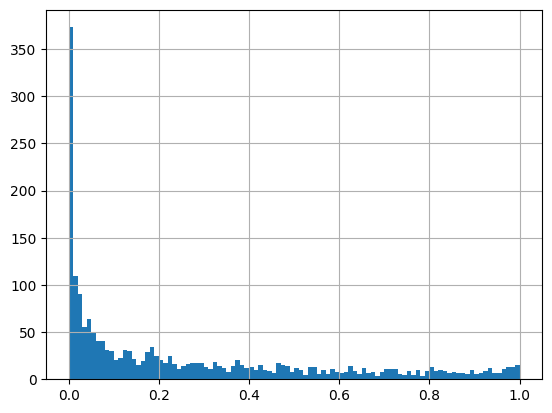

In [4]:
# plot histogram of `accousticness`
spotify["acousticness"].hist(bins=np.arange(0, 1.01, 0.01))
plt.show()


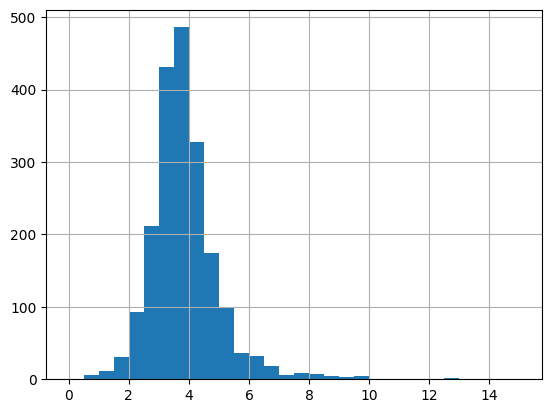

In [5]:
# plot histogram of `duration_minutes`
spotify["duration_minutes"].hist(bins=np.arange(0, 15.5, 0.5))
plt.show()


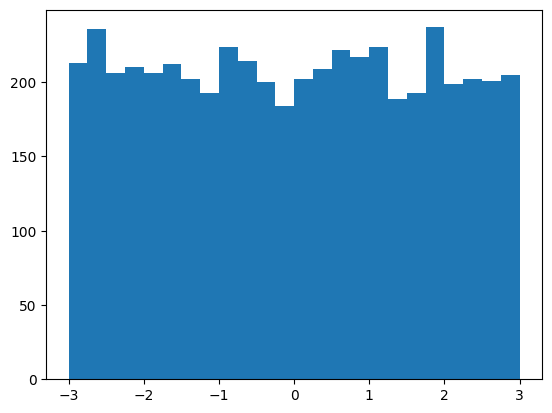

In [6]:
# generate 5000 random numbers from uniform distribution of -3 to 3
np.random.seed(42)
uniforms = np.random.uniform(-3, 3, 5000)

# plot histograms
plt.hist(uniforms, bins=np.arange(-3, 3.25, 0.25))
plt.show()


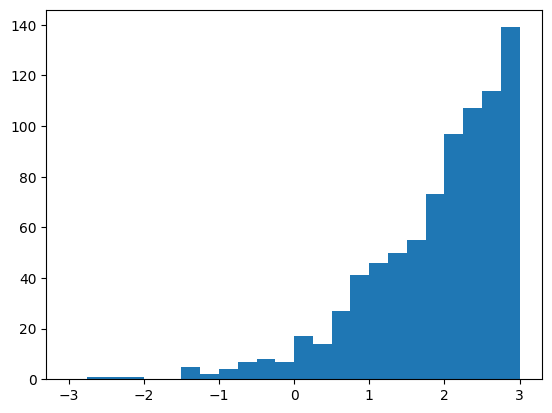

In [7]:
# generate 5000 from normal distribution of loc 5 and scale 2
normals = np.random.normal(5, 2, 5000)

# plot histograms
plt.hist(normals, bins=np.arange(-3, 3.25, 0.25))
plt.show()


## Sampling Methods

_Simple random sampling_ is a sampling method where each observation has an equal chance of being selected. _Systematic sampling_ is a sampling method where every $k$-th observation is selected.

In [8]:
# sample 70 rows from `attrition` using simple random sampling
sample_size = 70
attrition_samp = attrition.sample(n=sample_size, random_state=42)

# calculate the population size from `attrition`
pop_size = len(attrition)

# calculate the interval
interval = pop_size // sample_size

# systematically sample 70 rows
attrition_sys_samp = attrition.iloc[::interval]
display(attrition_sys_samp.head())


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,21,0.0,Travel_Rarely,391,Research_Development,15,College,Life_Sciences,High,Male,...,Excellent,Very_High,0,0,6,Better,0,0,0,0
21,19,0.0,Travel_Rarely,1181,Research_Development,3,Below_College,Medical,Medium,Female,...,Excellent,Very_High,0,1,3,Better,1,0,0,0
42,45,0.0,Travel_Rarely,252,Research_Development,2,Bachelor,Life_Sciences,Medium,Female,...,Excellent,Very_High,0,1,3,Better,1,0,0,0
63,23,0.0,Travel_Rarely,373,Research_Development,1,College,Life_Sciences,Very_High,Male,...,Outstanding,Very_High,1,1,2,Better,1,0,0,1
84,30,1.0,Travel_Rarely,945,Sales,9,Bachelor,Medical,Medium,Male,...,Excellent,High,0,1,3,Good,1,0,0,0


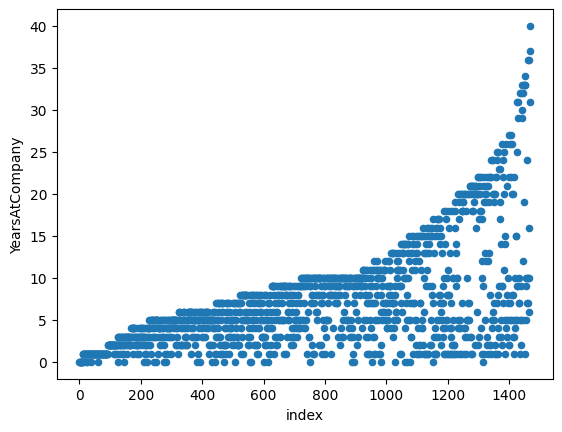

In [9]:
# add index to `attrition`
attrition_idx = attrition.reset_index()

# plot `YearsAtCompany` vs index
attrition_idx.plot(kind="scatter", x="index", y="YearsAtCompany")
plt.show()


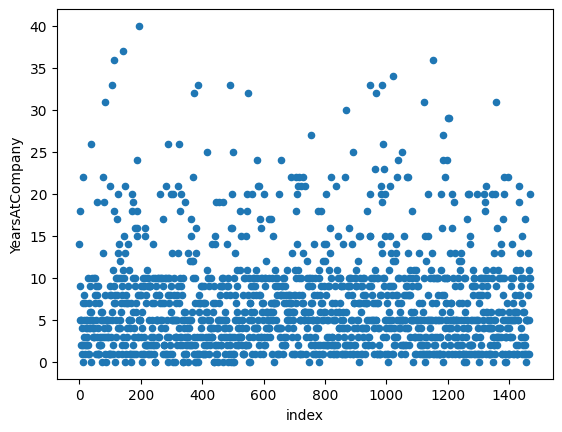

In [10]:
# shuffle `attrition` and reset index
attrition_shuffled = attrition.sample(frac=1)
attrition_shuffled = attrition_shuffled.reset_index(drop=True).reset_index()

# plot `YearsAtCompany` vs index
attrition_shuffled.plot(kind="scatter", x="index", y="YearsAtCompany")
plt.show()


### Stratified Sampling

Stratified sampling is a sampling method where the population is divided into non-overlapping groups called _strata_, and a simple random sample is taken from each stratum.

In [11]:
# statified sampling with 40% of each group
attrition_strat = attrition.groupby("Education").sample(frac=0.4, random_state=42)

# calculate education level proportions
education_counts_strat = attrition_strat["Education"].value_counts(normalize=True)
print(education_counts_strat)


Education
Bachelor         0.389456
Master           0.270408
College          0.192177
Below_College    0.115646
Doctor           0.032313
Name: proportion, dtype: float64


#### Equal counts stratified sampling

If one subgroup is larger than another subgroup in the population, but you don't want to reflect that in your analysis, then you can use _equal counts stratified sampling_. This generates samples where each subgroup has the same number of observations.

For example, if you were analyzing blood types, O is the most common worldwide. In your analysis you might want equal amounts of O, A, B, and AB.


In [12]:
# get 30 employees from each education group
attrition_eq = attrition.groupby("Education").sample(n=30, random_state=42)

# calculate proportions
education_counts_eq = attrition_eq["Education"].value_counts(normalize=True)
print(education_counts_eq)


Education
Bachelor         0.2
Below_College    0.2
College          0.2
Doctor           0.2
Master           0.2
Name: proportion, dtype: float64


### Weighted Sampling

Stratified sampling provides rules about the number of observations to take from each subgroup, but it does not provide rules about how to take those observations. That is known as _weighted sampling_.


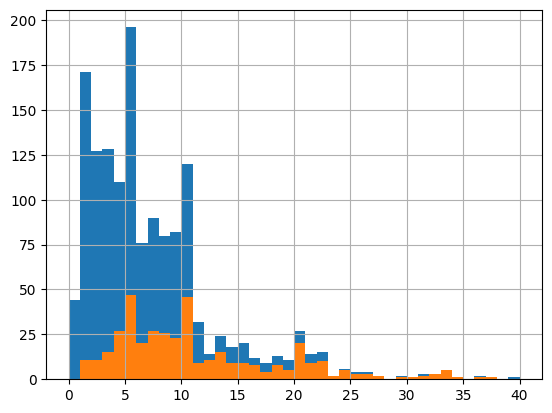

In [13]:
# hist plot `YearsAtCompany`
attrition["YearsAtCompany"].hist(bins=np.arange(0, 41, 1))

# sample 400 employees
attrition_weight = attrition.sample(n=400, random_state=42, weights="YearsAtCompany")
attrition_weight["YearsAtCompany"].hist(bins=np.arange(0, 41, 1))
plt.show()


### Cluster Sampling

_Cluster sampling_ is useful when it would be impractical to randomly sample the entire population. Instead, you can segment the population into non-overlapping _clusters_ and then take a simple random sample of clusters. All observations in the selected clusters are included in the sample.

In [14]:
job_roles = list(attrition["JobRole"].unique())

# randomly sample 4 job roles
job_roles_samp = random.sample(job_roles, k=4)

# filter for rows where `JobRole` is in `job_roles_samp`
attrition["JobRole"] = attrition["JobRole"].astype("category")
jobrole_condition = attrition["JobRole"].isin(job_roles_samp)
attrition_filtered = attrition[jobrole_condition]

# remove categories with no rows and randomly sample 10 employees
attrition_filtered.loc[:, "JobRole"] = attrition_filtered["JobRole"].cat.remove_unused_categories()
attrition_cluster = attrition_filtered.groupby("JobRole", observed=False).sample(
    n=10, random_state=42
)
display(attrition_cluster.head())


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
435,25,0.0,Travel_Rarely,309,Human_Resources,2,Bachelor,Human_Resources,High,Female,...,Excellent,High,0,6,3,Better,2,0,1,2
934,34,1.0,Travel_Frequently,988,Human_Resources,23,Bachelor,Human_Resources,Medium,Female,...,Excellent,High,3,11,2,Better,3,2,0,2
1061,44,0.0,Travel_Frequently,602,Human_Resources,1,Doctor,Human_Resources,Low,Male,...,Excellent,High,0,14,3,Better,10,7,0,2
373,28,0.0,Travel_Rarely,1169,Human_Resources,8,College,Medical,Medium,Male,...,Excellent,Very_High,1,6,6,Better,5,1,0,4
983,39,0.0,Travel_Rarely,141,Human_Resources,3,Bachelor,Human_Resources,High,Female,...,Excellent,High,1,12,3,Bad,8,3,3,6


## Sampling Distributions

The size of the sample you take affects how accurately your sample estimates the population. For example, when you want to calculate a sample mean, you want it to be close to the population mean.

The most common metric for assessing the accuracy of an estimate is _relative error_. This is the absolute distance between the estimate and the true value divided by the true value:

$\text{relative error} = \frac{|\text{estimate} - \text{true value}|}{\text{true value}}$


In [15]:
# simple random sample of 50 rows
attrition_50 = attrition.sample(n=50, random_state=42)

# calculate mean employee attrition
mean_attrition_50 = attrition_50["Attrition"].mean()

# calculate relative error percentage
rel_error_50 = (
    abs(mean_attrition_50 - attrition["Attrition"].mean()) / attrition["Attrition"].mean() * 100
)
print(rel_error_50)


24.05063291139242


### Replicating samples

When you calculate a sample statistic from a sample, you get a _point estimate_. If you take multiple samples from the same population, you get multiple point estimates. The distribution of these point estimates is the _sampling distribution_.

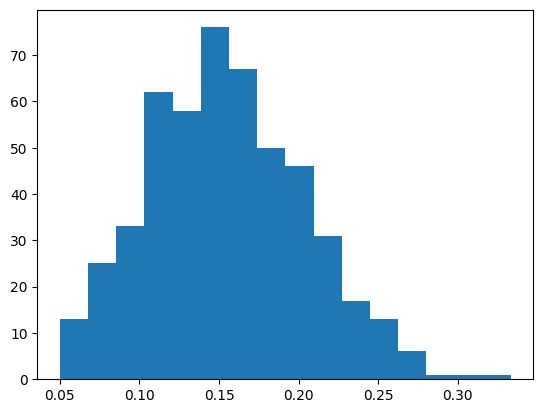

In [16]:
mean_attritions = []

# take 500 sample means of `Attrition` of size 60
for i in range(500):
    attrition_samp = attrition.sample(n=60, random_state=i)
    mean_attritions.append(attrition_samp["Attrition"].mean())

plt.hist(mean_attritions, bins=16)
plt.show()


### Exact sampling distribution

When we calculate the sampling distribution using the actual population, we get the _exact sampling distribution_.

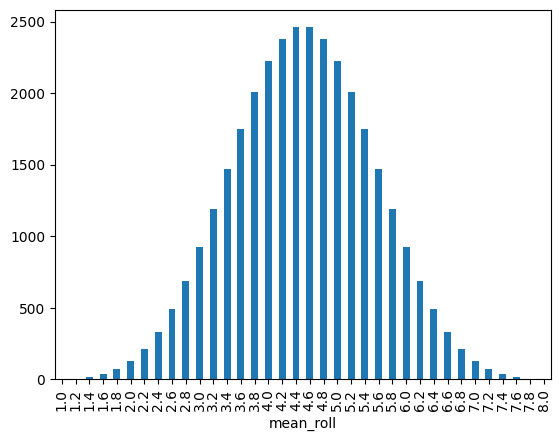

In [17]:
# https://pandas.pydata.org/docs/user_guide/cookbook.html#creating-example-data
def expand_grid(data_dict):
    rows = product(*data_dict.values())
    return pd.DataFrame.from_records(rows, columns=data_dict.keys())


# expand a grid representing 5 8-sided die using pd.expand_grid()
dice = expand_grid(dict(zip(["die1", "die2", "die3", "die4", "die5"], [np.arange(1, 9)] * 5)))

# add `mean_roll` column and convert to categorical
dice["mean_roll"] = dice.mean(axis=1)
dice["mean_roll"] = dice["mean_roll"].astype("category")

# bar plot `mean_roll`
dice["mean_roll"].value_counts(sort=False).plot(kind="bar")
plt.show()


### Approximate sampling distribution

With just 5 8-sided die, there are over 30,000 possible rolls ($8^5$). When the dataset is more complicated, the number of possible outcomes is too large to compute. In these situations, we can use _approximate sampling distributions_ by simulating the exact sampling distribution.

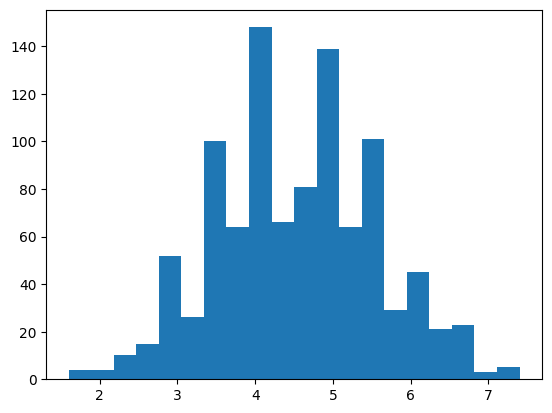

In [18]:
# replicate 1000 times
sample_means_1000 = []
for i in range(1000):
    five_rolls = np.random.choice(np.arange(1, 9), size=(5), replace=True)
    sample_means_1000.append(five_rolls.mean())

plt.hist(sample_means_1000, bins=20)
plt.show()


### Central Limit Theorem

The _Central Limit Theorem_ asserts that the distribution of sample means approaches a normal distribution as the sample size gets larger, regardless of the shape of the population distribution.

The mean of this sampling distribution is equal to the population mean, and the spread of this distribution is quantified by the _standard error_. As the sample size increases, the standard error decreases, reflecting greater precision of the sample mean:

$\text{standard error} = \frac{s}{\sqrt{n}}$

where $s$ is the sample standard deviation and $n$ is the sample size.

In [19]:
# sample size of 5 of `attrition`
sampling_distribution_5 = []
for i in range(1000):
    sample = attrition.sample(n=5, random_state=i)
    sampling_distribution_5.append(sample["Attrition"].mean())

# sample size of 50
sampling_distribution_50 = []
for i in range(1000):
    sample = attrition.sample(n=50, random_state=i)
    sampling_distribution_50.append(sample["Attrition"].mean())

# sample size of 500
sampling_distribution_500 = []
for i in range(1000):
    sample = attrition.sample(n=500, random_state=i)
    sampling_distribution_500.append(sample["Attrition"].mean())


In [20]:
# mean of mean attritions
mean_of_means_5 = np.mean(sampling_distribution_5)
mean_of_means_50 = np.mean(sampling_distribution_50)
mean_of_means_500 = np.mean(sampling_distribution_500)
print(mean_of_means_5)
print(mean_of_means_50)
print(mean_of_means_500)


0.158
0.15862
0.16147399999999998


In [21]:
# sd of mean attritions
sd_of_means_5 = np.std(sampling_distribution_5, ddof=1)
sd_of_means_50 = np.std(sampling_distribution_50, ddof=1)
sd_of_means_500 = np.std(sampling_distribution_500, ddof=1)
print(sd_of_means_5)
print(sd_of_means_50)
print(sd_of_means_500)


0.16906976247864247
0.051880508740635795
0.013642046379829876


## Bootstrap Distributions

_Bootstrapping_ is in some sense the opposite of sampling from a population.

Sampling treats your dataset as the population and takes a random subset of observations from it. Bootstrapping uses your dataset to build a theoretical population by sampling with replacement.

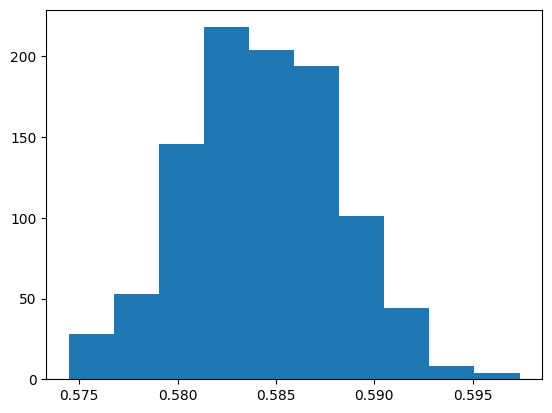

In [22]:
mean_danceability_1000 = []
for i in range(1000):
    sample = spotify.sample(replace=True, frac=1, random_state=i)
    mean_danceability_1000.append(np.mean(sample["danceability"]))

plt.hist(mean_danceability_1000)
plt.show()


### Sampling distribution vs bootstrap distribution

The sampling distribution and bootstrap distribution are closely linked. In situations where you can repeatedly sample from a population (rare), it's helpful to generate both to see how they are related.

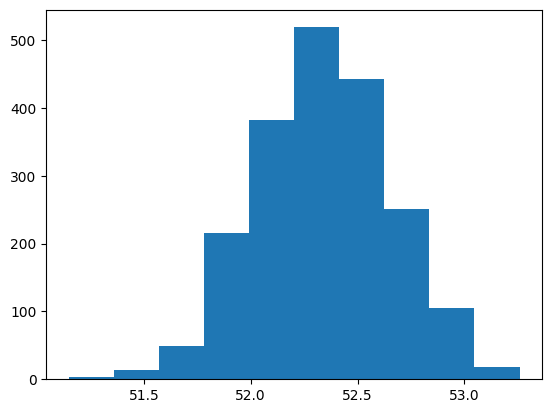

In [23]:
mean_popularity_2000_samp = []
for i in range(2000):
    sample = spotify.sample(n=500, random_state=i)
    mean_popularity_2000_samp.append(np.mean(sample["popularity"]))

plt.hist(mean_popularity_2000_samp)
plt.show()


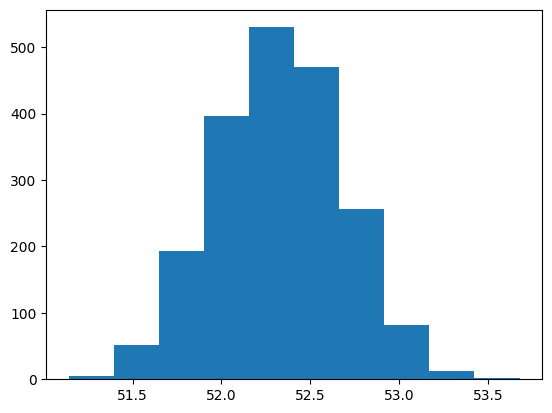

In [24]:
mean_popularity_2000_boot = []
for i in range(2000):
    sample = spotify.sample(n=500, replace=True, random_state=i)
    mean_popularity_2000_boot.append(np.mean(sample["popularity"]))

plt.hist(mean_popularity_2000_boot)
plt.show()


### Confidence intervals

A _confidence interval_ is a range of values that is likely to contain the true value of a population parameter with a certain level of confidence, typically 95%.

The _quantile method_ is one way to calculate confidence intervals. Determine the bootstrap distribution and find the lower and upper bounds of the confidence interval by finding the values that correspond to the 5th and 95th percentiles respectively.

The _standard error method_ is another way to calculate confidence intervals. Take the sample statistic ($\text{mean}$ in this example) and add or subtract the product of the standard error and $z$-score that corresponds to the desired confidence level. The $z$-score is found using the standard normal distribution.

In [25]:
# 97.5%
lower_quant = np.quantile(mean_popularity_2000_boot, 0.025)
upper_quant = np.quantile(mean_popularity_2000_boot, 0.975)
print(lower_quant)
print(upper_quant)


51.619949999999996
53.03405


In [26]:
point_estimate = np.mean(mean_popularity_2000_boot)
standard_error = np.std(mean_popularity_2000_boot, ddof=1)

# confidence interval boundaries
lower_se = norm.ppf(0.025, loc=point_estimate, scale=standard_error)
upper_se = norm.ppf(0.975, loc=point_estimate, scale=standard_error)
print(lower_se)
print(upper_se)


51.61850255834978
53.03480744165022
